# CTG VIZ
Este notebook muestra utilizar la librería ctg_viz para análisis de datos

In [ ]:
import sys
sys.path.insert(0, "../")

In [ ]:
from ctg_viz import preprocessing as prep
from ctg_viz import categorization as categ
from ctg_viz import utils
from ctg_viz.plots import histograms
import pandas as pd

In [ ]:
df = pd.read_csv('D:/m1_practica3/CTG.csv')

## 1. Preprocesamiento de datos

In [ ]:
# 1. Eliminar columnas con más de 20% de nulos
df_null_removed = prep.drop_columns_with_missing_values(df, threshold=0.2)

removed_columns = set(df.columns) - set(df_null_removed.columns)
print(f'Removed columns ({len(removed_columns)}):', removed_columns)


Removed columns (0): set()


In [ ]:
# 2. Imputar valores faltantes
# 2.0 Filas con valores faltantes
index_null_rows = df.isnull().sum(axis=1)[df.isnull().sum(axis=1) > 0].index
mask_rows_null_values = df.index.isin(index_null_rows)
df[mask_rows_null_values]

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,564.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 2.1 Valores imputados con media. (Columnas categóricas con moda)
df_inputed = prep.imput_values(df, numeric_strategy='mean')
df_inputed[mask_rows_null_values]

Numeric columns to impute: ['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']
Categorical columns to impute: ['FileName', 'Date', 'SegFile']


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
2126,S8001034.dsp,2/22/1995,CTG0001.txt,878.439793,1702.877234,133.303857,133.303857,2.722484,7.503056,3.669017,...,0.024929,0.0381,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
2127,S8001034.dsp,2/22/1995,CTG0001.txt,878.439793,1702.877234,133.303857,133.303857,2.722484,7.503056,3.669017,...,0.024929,0.0381,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
2128,S8001034.dsp,2/22/1995,CTG0001.txt,878.439793,1702.877234,133.303857,133.303857,2.722484,564.000000,23.000000,...,0.024929,0.0381,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327


In [ ]:
df[['b', 'e']].mean()

b     878.439793
e    1702.877234
dtype: float64

In [ ]:
# 2.2 Valores imputados con mediana. (Columnas categóricas con moda)
df_inputed_median = prep.imput_values(df, numeric_strategy='median')
df_inputed_median[mask_rows_null_values]

Numeric columns to impute: ['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']
Categorical columns to impute: ['FileName', 'Date', 'SegFile']


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
2126,S8001034.dsp,2/22/1995,CTG0001.txt,538.0,1241.0,133.0,133.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
2127,S8001034.dsp,2/22/1995,CTG0001.txt,538.0,1241.0,133.0,133.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
2128,S8001034.dsp,2/22/1995,CTG0001.txt,538.0,1241.0,133.0,133.0,1.0,564.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0


In [ ]:
df[['b', 'e']].median()

b     538.0
e    1241.0
dtype: float64

In [ ]:
# 2.3 Imputación con KNN. (Columnas categóricas con moda)
df_inputed_knn = prep.imput_values(df, numeric_strategy='knn')
df_inputed_knn[mask_rows_null_values]

Numeric columns to impute: ['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']
Categorical columns to impute: ['FileName', 'Date', 'SegFile']
Using KNN Imputer for numeric columns


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
2126,S8001034.dsp,2/22/1995,CTG0001.txt,878.439793,1702.877234,133.303857,133.303857,2.722484,7.503056,3.669017,...,0.024929,0.0381,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
2127,S8001034.dsp,2/22/1995,CTG0001.txt,532.400000,1174.800000,125.200000,125.200000,0.000000,1.000000,6.000000,...,0.000000,0.0000,0.200000,0.000000,0.000000,0.000000,0.800000,0.000000,8.200000,2.600000
2128,S8001034.dsp,2/22/1995,CTG0001.txt,1.400000,1198.000000,131.400000,131.400000,4.800000,564.000000,23.000000,...,0.000000,0.0000,0.000000,0.600000,0.200000,0.200000,0.000000,0.000000,6.600000,1.600000


In [ ]:
# 3. Remover valores atípicos (outliers)
# 3.1 IQR
df_no_outliers_iqr = prep.remove_outliers(df, method='iqr')
print(f'Original shape: {df.shape}, After IQR outlier removal: {df_no_outliers_iqr.shape}')

Rows deleted: 1539 (72.29%)
Original shape: (2129, 40), After IQR outlier removal: (590, 40)


In [ ]:
# 3.2 Z-Score (Necesita usar columnas sin nulos)
df_no_outliers_zscore = prep.remove_outliers(df_inputed_knn, method='zscore', z_threshold=3)
print(f'Original shape: {df.shape}, After Z-Score outlier removal: {df_no_outliers_zscore.shape}')

Rows deleted: 598 (28.09%)
Original shape: (2129, 40), After Z-Score outlier removal: (1531, 40)


## 2. Análisis de datos (Categorización)

In [ ]:
# 1. Función para data completeness
completeness_report = utils.check_data_completeness_alejandro_sosa_murguia(df)
completeness_report


,Column,Data Type,Non-Null Count,Null Count,Completeness (%),Mean,Median,Std Dev,Min,Max
0,FileName,object,2126,3,99.859089,NaN,NaN,NaN,NaN,NaN
1,Date,object,2126,3,99.859089,NaN,NaN,NaN,NaN,NaN
2,SegFile,object,2126,3,99.859089,NaN,NaN,NaN,NaN,NaN
3,b,float64,2126,3,99.859089,878.439793,538.0,894.084748,0.0,3296.0
4,e,float64,2126,3,99.859089,1702.877234,1241.0,930.919143,287.0,3599.0
5,LBE,float64,2126,3,99.859089,133.303857,133.0,9.840844,106.0,160.0
6,LB,float64,2126,3,99.859089,133.303857,133.0,9.840844,106.0,160.0
7,AC,float64,2126,3,99.859089,2.722484,1.0,3.560850,0.0,26.0
8,FM,float64,2127,2,99.906059,7.503056,0.0,39.030452,0.0,564.0
9,UC,float64,2127,2,99.906059,3.669017,3.0,2.877148,0.0,23.0


In [ ]:
# 2. Clasificar automaticamente las columnas en categóricas, numéricas continuas y numéricas discretas
column_types = categ.classify_column_types(df)
print('categorical', column_types['categorical'][:3], '...')
print('continuous_numerical', column_types['continuous_numerical'][:3], '...')
print('discrete_numerical', column_types['discrete_numerical'][:3], '...')

categorical ['FileName', 'Date', 'SegFile'] ...
continuous_numerical ['b', 'e', 'LBE'] ...
discrete_numerical ['DS', 'DP', 'DR'] ...


## 3. Visualización

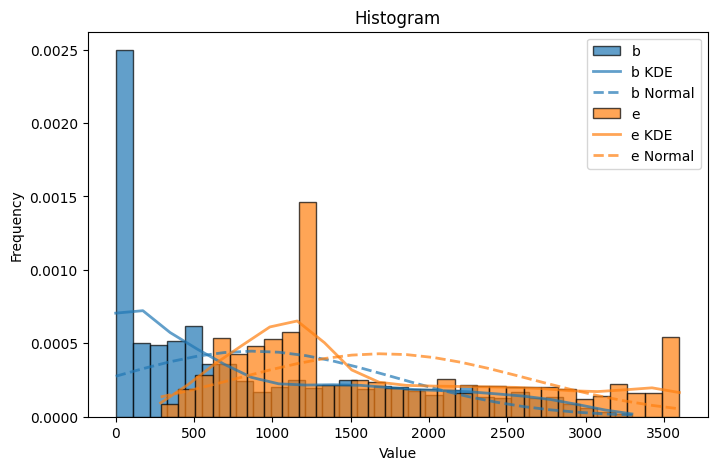

In [ ]:
# 1.1 Histograma
columns = ['b', 'e']
# columns = ['e']
matplotlib_hist = histograms.histogram_matplotlib(df_inputed_knn, columns, show_density=True, show_kde=True)
# Note: Since the KDE is computed manually, data can't contain null values

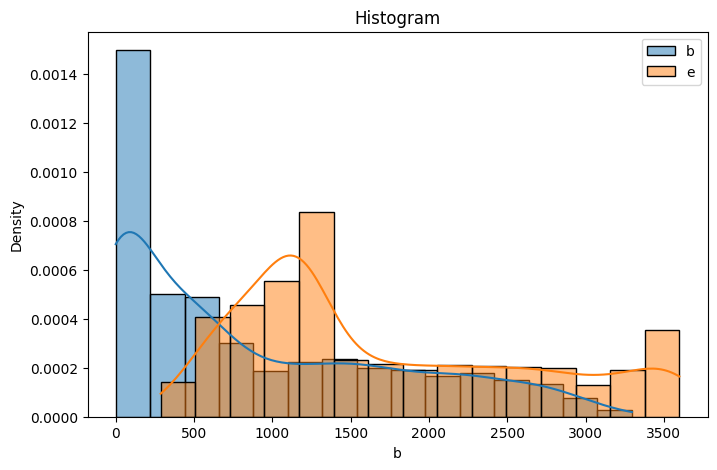

In [ ]:
# 1.2 Histograma
columns = ['b', 'e']
# columns = ['e']
sns_hist = histograms.histogram_seaborn(df_inputed_knn, columns, show_kde = True, show_density = True)

In [ ]:
# 1.3 Histograma
plotly_hist = histograms.histogram_plotly(df, 'b')
plotly_hist